## Impact of political constraints on transmission of monetary policy shocks to macroeconomy
**Author: Suraj Kumar** *(Along with Dr. Mitra, and Prof. Chatterjee)*

*Centre for Advanced Financial Research and Learning, Reserve Bank of India, Mumbai*


**Abstract**
* In this notebook, I analyze the impact of monetary policy shocks on inflation, IP and REER under high and low political constraints' environment for 15 emerging-market countries. Specifically I run, the following regressions:

**Eq1:**
$
\begin{align}
\pi_{c,t+h} = \sum_{j=1}^J \alpha_j^h \pi_{c,t-j}  + \sum_{k=1}^K \beta_k^h i_{c,t-k}+ \text{FEs (country, time)}
\end{align}
$

**Eq2:**
$
\begin{align}
\text{IP}_{c,t+h} = \sum_{j=1}^J \alpha_j^h \text{IP}_{c,t-j}  + \sum_{k=1}^K \beta_k^h i_{c,t-k}+ \text{FEs (country, time)}
\end{align}
$
**Eq3:**
$
\begin{align}
REER_{c,t+h} = \sum_{j=1}^J \alpha_j^h REER_{c,t-j}  + \sum_{k=1}^K \beta_k^h i_{c,t-k}+ \text{FEs (country, time)}
\end{align}
$

where $i_{c,t}$ is the policy rate, $\pi_{c,t}$ is the inflation rate, $\text{IP}_{c,t}$ is the industrial production growth, $\text{REER}_{c,t}$ is the change in real effective exchange rate, and $h$ is the horizon.

**Data**
* Macro-data: policy rate, inflation, IP and REER for Brazil, Chile, Colombia, Indonesia, South Korea, Mexico, Malaysia, Peru, Philippines, Russia, Thailand, Turkey, Taiwan, South Africa and India. 
* Political constraints'data : [Upenn's POLCON dataset](https://mgmt.wharton.upenn.edu/faculty/heniszpolcon/polcondataset/)
Specifically, I use "polconv" as a measure for political constraints from there 2017 data release.

**High/Low POLCON Regime**

In the following set of codes, I estimate IRF of IP,CPI and REER to policy rate shocks for two different POLCON regimes. I define

* High Polcon regime (H2): $pconv_{c,t} > Median(pconv_{c,t})$ for country $i$
* Low Polcon regime (L2): $pconv_{c,t} \leq  Median(pconv_{c,t})$ for country $i$

Here the $Median$ is calculated differently for each country, note we already have this information in data segregated by $dumL2, dumH2$.


**Findings**

Please note these results are based on simple panel local projections which may suffer from endogeneity between independent and dependent variables. However, as first-cut results, they are useful to look at. 

1. We see the evidence of price puzzle in both the low and high political constrained regime.
2. IP reacts much more negatively to monetary policy in high-political constrained environment than in low-political constrained environment. 
3. REER, surprisingly, is not showing significant response to monetary policy shocks. 


**Code Credits**

[Oscar Jorda STATA Code](https://sites.google.com/site/oscarjorda/home/local-projections)

In [2]:
// Set more
set more off

* * * * * * * Navigating to the folder
global folder "/Users/suraj/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empirics"
cd "$folder"

// Loading data
use "./data/panel_df_tr2.dta", clear
// describe




/Users/suraj/Library/CloudStorage/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empi
> rics



In [3]:
* Choose impulse reponse horizon for macro variables such as cpi, reer, and ip. These macro variables are already in log terms
local hmax = 24
foreach x in cpi reer ip{
    forvalue h = 0/`hmax'{
        qui gen `x'_yoy_`h' = f`h'.`x'-l12.f`h'.`x'
    }
    * Creating simple inflation variable also apart from the subscripts 
    qui gen `x'_yoy = `x'-l12.`x'
}

In [4]:
// Specifying options for local projection regression 
local ar = 12
local ma = 12

In [5]:
* Response of CPI/IP/REER to shocks in short-run rates(SRR) for all countries
eststo clear
qui cap drop horizons Zero b_cpi_srr u_cpi_srr d_cpi_srr b_ip_srr u_ip_srr d_ip_srr b_reer_srr u_reer_srr d_reer_srr

* Initializing variables to store the regression output
qui gen horizons = _n-1 if _n <= `hmax'
qui gen Zero = 0 if _n <= `hmax'
qui gen b_cpi_srr = .
qui gen u_cpi_srr = .
qui gen d_cpi_srr = .
qui gen b_ip_srr = .
qui gen u_ip_srr = .
qui gen d_ip_srr = .
qui gen b_reer_srr = .
qui gen u_reer_srr = .
qui gen d_reer_srr = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe cpi_yoy_`h' l(0/`ma').srr l(1/`ar').cpi_yoy , absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_cpi_srr = _b[srr]  if _n == `h'+1
    qui replace u_cpi_srr = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_cpi_srr = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

forv h = 0/`hmax'{
    ** Regression 2
    * on ip
    qui reghdfe ip_yoy_`h' l(0/`ma').srr l(1/`ar').ip_yoy, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the ip Coefficient Reults
    qui replace b_ip_srr = _b[srr]  if _n == `h'+1
    qui replace u_ip_srr = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_ip_srr = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

forv h = 0/`hmax'{
    ** Regression 3
    * on reer
    qui reghdfe reer_yoy_`h' l(0/`ma').srr l(1/`ar').reer_yoy, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the reer Coefficient Reults
    qui replace b_reer_srr = _b[srr]  if _n == `h'+1
    qui replace u_reer_srr = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_reer_srr = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

// // Saving the regression output
// esttab using "$folder/analysis/effect_of_srr_on_macro_vars.html", html replace

#### 2. Effect of interest rate shocks on Macro variables on High vs Low POLCON Environment

I define the low/high POLCON based on H2/L2 variable.

**Low POLCON**

In [6]:
* Response of CPI/IP/REER to shocks in short-run rates(SRR) for low-political constrained countries
eststo clear
qui cap drop b_cpi_srr_L2 u_cpi_srr_L2 d_cpi_srr_L2 b_ip_srr_L2 u_ip_srr_L2 d_ip_srr_L2 b_reer_srr_L2 u_reer_srr_L2 d_reer_srr_L2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_cpi_srr_L2 = .
qui gen u_cpi_srr_L2 = .
qui gen d_cpi_srr_L2 = .
qui gen b_ip_srr_L2 = .
qui gen u_ip_srr_L2 = .
qui gen d_ip_srr_L2 = .
qui gen b_reer_srr_L2 = .
qui gen u_reer_srr_L2 = .
qui gen d_reer_srr_L2 = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe cpi_yoy_`h' l(0/`ma').srr l(1/`ar').cpi_yoy if dumL2 == 1 , absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_cpi_srr_L2 = _b[srr]  if _n == `h'+1
    qui replace u_cpi_srr_L2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_cpi_srr_L2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
 
}

forv h = 0/`hmax'{
    ** Regression 2
    * on ip
    qui reghdfe ip_yoy_`h' l(0/`ma').srr l(1/`ar').ip_yoy if dumL2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the ip Coefficient Reults
    qui replace b_ip_srr_L2 = _b[srr]  if _n == `h'+1
    qui replace u_ip_srr_L2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_ip_srr_L2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

forv h = 0/`hmax'{
    ** Regression 3
    * on reer
    qui reghdfe reer_yoy_`h' l(0/`ma').srr l(1/`ar').reer_yoy if dumL2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the reer Coefficient Reults
    qui replace b_reer_srr_L2 = _b[srr]  if _n == `h'+1
    qui replace u_reer_srr_L2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_reer_srr_L2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

// // Saving the regression output
// esttab using "$folder/regression/effect_of_srr_on_macro_vars_L2.html", html replace

**High POLCON**

In [7]:
* Response of CPI/IP/REER to shocks in short-run rates(SRR) for high-political constrained countries
eststo clear
qui cap drop b_cpi_srr_H2 u_cpi_srr_H2 d_cpi_srr_H2 b_ip_srr_H2 u_ip_srr_H2 d_ip_srr_H2 b_reer_srr_H2 u_reer_srr_H2 d_reer_srr_H2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_cpi_srr_H2 = .
qui gen u_cpi_srr_H2 = .
qui gen d_cpi_srr_H2 = .
qui gen b_ip_srr_H2 = .
qui gen u_ip_srr_H2 = .
qui gen d_ip_srr_H2 = .
qui gen b_reer_srr_H2 = .
qui gen u_reer_srr_H2 = .
qui gen d_reer_srr_H2 = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe cpi_yoy_`h' l(0/`ma').srr l(1/`ar').cpi_yoy if dumH2 == 1 , absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_cpi_srr_H2 = _b[srr]  if _n == `h'+1
    qui replace u_cpi_srr_H2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_cpi_srr_H2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
 
}

forv h = 0/`hmax'{
    ** Regression 2
    * on ip
    qui reghdfe ip_yoy_`h' l(0/`ma').srr l(1/`ar').ip_yoy if dumH2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the ip Coefficient Reults
    qui replace b_ip_srr_H2 = _b[srr]  if _n == `h'+1
    qui replace u_ip_srr_H2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_ip_srr_H2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

forv h = 0/`hmax'{
    ** Regression 3
    * on reer
    qui reghdfe reer_yoy_`h' l(0/`ma').srr l(1/`ar').reer_yoy if dumH2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the reer Coefficient Reults
    qui replace b_reer_srr_H2 = _b[srr]  if _n == `h'+1
    qui replace u_reer_srr_H2 = _b[srr] + 1.96*_se[srr] if _n == `h'+1
    qui replace d_reer_srr_H2 = _b[srr] - 1.96*_se[srr] if _n == `h'+1
    qui eststo
}

// // Saving the regression output
// esttab using "$folder/regression/effect_of_srr_on_macro_vars_H2.html", html replace

Plotting the three results together - 1. Low Polcon 2. High Polcon and 3. All

In [8]:
////////// Plotting for all Countries

// Plotting effect of CPI to SRR shocks
qui twoway ///
(rarea u_cpi_srr d_cpi_srr horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_cpi_srr horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of cpi to 1pp shock to SRR (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_cpi_srr, replace


// Plotting effect of IP to SRR shocks
qui twoway ///
(rarea u_ip_srr d_ip_srr horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_ip_srr horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of ip to 1pp shock to SRR (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_ip_srr, replace

// Plotting effect of REER to SRR shocks
qui twoway ///
(rarea u_reer_srr d_reer_srr horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_reer_srr horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of reer to 1pp shock to SRR (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_reer_srr, replace




////////// Plotting for Low POLCON Regime

// Plotting effect of CPI to SRR shocks
qui twoway ///
(rarea u_cpi_srr_L2 d_cpi_srr_L2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_cpi_srr_L2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of cpi to 1pp shock to SRR (L2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_cpi_srr_L2, replace


// Plotting effect of IP to SRR shocks
qui twoway ///
(rarea u_ip_srr_L2 d_ip_srr_L2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_ip_srr_L2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of ip to 1pp shock to SRR (L2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_ip_srr_L2, replace

// Plotting effect of REER to SRR shocks
qui twoway ///
(rarea u_reer_srr_L2 d_reer_srr_L2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_reer_srr_L2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of reer to 1pp shock to SRR (L2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_reer_srr_L2, replace


////////// Plotting for High POLCON Regime

// Plotting effect of CPI to SRR shocks
qui twoway ///
(rarea u_cpi_srr_H2 d_cpi_srr_H2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_cpi_srr_H2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of cpi to 1pp shock to SRR (H2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_cpi_srr_H2, replace


// Plotting effect of IP to SRR shocks
qui twoway ///
(rarea u_ip_srr_H2 d_ip_srr_H2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_ip_srr_H2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of ip to 1pp shock to SRR (H2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_ip_srr_H2, replace

// Plotting effect of REER to SRR shocks
qui twoway ///
(rarea u_reer_srr_H2 d_reer_srr_H2 horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_reer_srr_H2 horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("IR of reer to 1pp shock to SRR (H2)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white))
gr rename fig_reer_srr_H2, replace




(note: graph fig_cpi_srr not found)


(note: graph fig_ip_srr not found)


(note: graph fig_reer_srr not found)


(note: graph fig_cpi_srr_L2 not found)


(note: graph fig_ip_srr_L2 not found)


(note: graph fig_reer_srr_L2 not found)


(note: graph fig_cpi_srr_H2 not found)


(note: graph fig_ip_srr_H2 not found)


(note: graph fig_reer_srr_H2 not found)


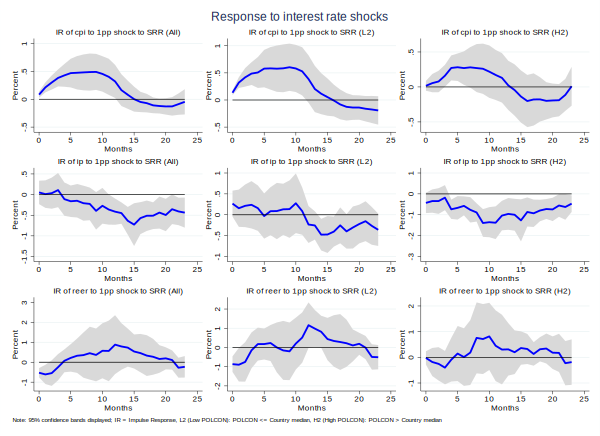




(file /Users/suraj/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empirics/Plots/LP_m
> acro_res_to_srr_shocks_all_L2_H2.png written in PNG format)


In [10]:
// Plotting all the charts together

// Combining the graphs
gr combine fig_cpi_srr fig_cpi_srr_L2 fig_cpi_srr_H2 fig_ip_srr fig_ip_srr_L2 fig_ip_srr_H2 fig_reer_srr fig_reer_srr_L2 fig_reer_srr_H2, ///
col(3) ///
imargin(tiny) ///
graphregion(color(white)) plotregion(color(white)) ///
iscale(*0.8) ///
title("Response to interest rate shocks", size(small)) ///
note("Note: 95% confidence bands displayed; IR = Impulse Response, L2 (Low POLCON): POLCON <= Country median, H2 (High POLCON): POLCON > Country median" ,size(tiny))

/* Save the combined graph to a file */
graph export "$folder/Plots/LP_macro_res_to_srr_shocks_all_L2_H2.png", width(2600) height(1600)  replace 

#### Result
![](LP_macro_res_to_srr_shocks_all_L2_H2.png)